# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop('Unnamed: 0', axis =1, inplace = True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [7]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [8]:
for z in [heroes_df[x].value_counts(normalize = True).head(3) for x in heroes_df.columns]:
    print(str(z)+'\n\n')

Goliath       0.004087
Spider-Man    0.004087
Atlas         0.002725
Name: name, dtype: float64


Male      0.688011
Female    0.272480
-         0.039510
Name: Gender, dtype: float64


blue     0.306540
-        0.234332
brown    0.171662
Name: Eye color, dtype: float64


-         0.414169
Human     0.283379
Mutant    0.085831
Name: Race, dtype: float64


-        0.234332
Black    0.215259
Blond    0.134877
Name: Hair color, dtype: float64


-99.0     0.295640
 183.0    0.080381
 188.0    0.069482
Name: Height, dtype: float64


Marvel Comics    0.539638
DC Comics        0.299026
NBC - Heroes     0.026426
Name: Publisher, dtype: float64


-        0.901907
green    0.028610
red      0.012262
Name: Skin color, dtype: float64


good       0.675749
bad        0.282016
neutral    0.032698
Name: Alignment, dtype: float64


-99.0    0.323770
 79.0    0.031421
 54.0    0.031421
Name: Weight, dtype: float64




In [9]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [10]:
powers_df['hero_names'].value_counts(sort=True, ascending=False)

Adam Monroe         1
Living Tribunal     1
Flash Gordon        1
Parademon           1
Kilowog             1
                   ..
Chamber             1
Toxin               1
Allan Quatermain    1
Triton              1
Mandarin            1
Name: hero_names, Length: 667, dtype: int64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




## Cleaning Powers Data
The powers dataframe seems to be complete and consist of boolian values with a string index. We set the index to `hero_names` below.

In [11]:
powers_df.set_index('hero_names', inplace=True)
powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Cleaning Heroes Data
There seems to be a mixture of missing values dummy values used to indicate that data is missing in this dataframe. Below we treat each variable separately. 

In [12]:
for name in heroes_df.columns:
    print(name)

name
Gender
Eye color
Race
Hair color
Height
Publisher
Skin color
Alignment
Weight


### Name
First, we note that there are no missing values in the names column.

In [13]:
heroes_df['name'].isna().max()

False

Second, note that there are duplicate values.

In [14]:
heroes_df['name'].duplicated().max()

True

Third, by inspection there do not seem to be any dummy values for missing data.

In [15]:
for name in heroes_df['name'].unique():
    print(name)

A-Bomb
Abe Sapien
Abin Sur
Abomination
Abraxas
Absorbing Man
Adam Monroe
Adam Strange
Agent 13
Agent Bob
Agent Zero
Air-Walker
Ajax
Alan Scott
Alex Mercer
Alex Woolsly
Alfred Pennyworth
Alien
Allan Quatermain
Amazo
Ammo
Ando Masahashi
Angel
Angel Dust
Angel Salvadore
Angela
Animal Man
Annihilus
Ant-Man
Ant-Man II
Anti-Monitor
Anti-Spawn
Anti-Venom
Apocalypse
Aquababy
Aqualad
Aquaman
Arachne
Archangel
Arclight
Ardina
Ares
Ariel
Armor
Arsenal
Astro Boy
Atlas
Atom
Atom Girl
Atom II
Atom III
Atom IV
Aurora
Azazel
Azrael
Aztar
Bane
Banshee
Bantam
Batgirl
Batgirl III
Batgirl IV
Batgirl V
Batgirl VI
Batman
Batman II
Battlestar
Batwoman V
Beak
Beast
Beast Boy
Beetle
Ben 10
Beta Ray Bill
Beyonder
Big Barda
Big Daddy
Big Man
Bill Harken
Billy Kincaid
Binary
Bionic Woman
Bird-Brain
Bird-Man
Bird-Man II
Birdman
Bishop
Bizarro
Black Abbott
Black Adam
Black Bolt
Black Canary
Black Cat
Black Flash
Black Goliath
Black Knight III
Black Lightning
Black Mamba
Black Manta
Black Panther
Black Widow
Black W

We conclude that no action is needed on this column.

### Gender
First, we note that there are no missing values. 

In [16]:
heroes_df['Gender'].isna().max()

False

Second, we note that there are three unique values for the Gender variable.

In [17]:
for value in heroes_df['Gender'].unique():
    print(value)

Male
Female
-


Third, the value `-` appears to be a dummy value indicating missing data. We replace `-` with `None Provided` below.

In [18]:
heroes_df['Gender'].replace('-', 'None Provided', inplace = True)

We confirm that the changes were applied below.

In [19]:
for value in heroes_df['Gender'].unique():
    print(value)

Male
Female
None Provided


### Eye Color
First, we note that there are no missing values. 

In [20]:
heroes_df['Eye color'].isna().max()

False

Second, we note that there are twenty three unique values for the `Eye color` variable.

In [21]:
index = 0
for value in heroes_df['Eye color'].unique():
    index +=1
    print(str(index)+'. '+value)

1. yellow
2. blue
3. green
4. brown
5. -
6. red
7. violet
8. white
9. purple
10. black
11. grey
12. silver
13. yellow / red
14. yellow (without irises)
15. gold
16. blue / white
17. hazel
18. green / blue
19. white / red
20. indigo
21. amber
22. yellow / blue
23. bown


Third, the value `-` appears to be a dummy value indicating missing data. We replace `-` with `None Provided` below.

In [22]:
heroes_df['Eye color'].replace('-', 'None Provided', inplace = True)

We confirm that the changes were applied below.

In [23]:
index = 0
for value in heroes_df['Eye color'].unique():
    index +=1
    print(str(index)+'. '+value)

1. yellow
2. blue
3. green
4. brown
5. None Provided
6. red
7. violet
8. white
9. purple
10. black
11. grey
12. silver
13. yellow / red
14. yellow (without irises)
15. gold
16. blue / white
17. hazel
18. green / blue
19. white / red
20. indigo
21. amber
22. yellow / blue
23. bown


### Race
First, we note that there are no missing values. 

In [24]:
heroes_df['Race'].isna().max()

False

Second, we note that there are sixty two unique values for the Gender variable.

In [25]:
index = 0
for value in heroes_df['Race'].unique():
    index += 1
    print(str(index)+'. '+value)

1. Human
2. Icthyo Sapien
3. Ungaran
4. Human / Radiation
5. Cosmic Entity
6. -
7. Cyborg
8. Xenomorph XX121
9. Android
10. Vampire
11. Mutant
12. God / Eternal
13. Symbiote
14. Atlantean
15. Alien
16. Neyaphem
17. New God
18. Alpha
19. Bizarro
20. Inhuman
21. Metahuman
22. Demon
23. Human / Clone
24. Human-Kree
25. Dathomirian Zabrak
26. Amazon
27. Human / Cosmic
28. Human / Altered
29. Kryptonian
30. Kakarantharaian
31. Zen-Whoberian
32. Strontian
33. Kaiju
34. Saiyan
35. Gorilla
36. Rodian
37. Flora Colossus
38. Human-Vuldarian
39. Asgardian
40. Demi-God
41. Eternal
42. Gungan
43. Bolovaxian
44. Animal
45. Czarnian
46. Martian
47. Spartoi
48. Planet
49. Luphomoid
50. Parademon
51. Yautja
52. Maiar
53. Clone
54. Talokite
55. Korugaran
56. Zombie
57. Human-Vulcan
58. Human-Spartoi
59. Tamaranean
60. Frost Giant
61. Mutant / Clone
62. Yoda's species


Third, the value `-` appears to be a dummy value indicating missing data. We replace `-` with `None Provided` below.

In [26]:
heroes_df['Race'].replace('-', 'None Provided', inplace = True)

We confirm that the changes were applied below.

In [27]:
for value in heroes_df['Race'].unique():
    print(value)

Human
Icthyo Sapien
Ungaran
Human / Radiation
Cosmic Entity
None Provided
Cyborg
Xenomorph XX121
Android
Vampire
Mutant
God / Eternal
Symbiote
Atlantean
Alien
Neyaphem
New God
Alpha
Bizarro
Inhuman
Metahuman
Demon
Human / Clone
Human-Kree
Dathomirian Zabrak
Amazon
Human / Cosmic
Human / Altered
Kryptonian
Kakarantharaian
Zen-Whoberian
Strontian
Kaiju
Saiyan
Gorilla
Rodian
Flora Colossus
Human-Vuldarian
Asgardian
Demi-God
Eternal
Gungan
Bolovaxian
Animal
Czarnian
Martian
Spartoi
Planet
Luphomoid
Parademon
Yautja
Maiar
Clone
Talokite
Korugaran
Zombie
Human-Vulcan
Human-Spartoi
Tamaranean
Frost Giant
Mutant / Clone
Yoda's species


### Hair Color
First, we note that there are no missing values. 

In [28]:
heroes_df['Hair color'].isna().max()

False

Second, we note that there are three unique values for the Gender variable.

In [29]:
index = 0
for value in heroes_df['Hair color'].unique():
    index += 1
    print(str(index) + '. ' + value)

1. No Hair
2. Black
3. Blond
4. Brown
5. -
6. White
7. Purple
8. Orange
9. Pink
10. Red
11. Auburn
12. Strawberry Blond
13. black
14. Blue
15. Green
16. Magenta
17. Brown / Black
18. Brown / White
19. blond
20. Silver
21. Red / Grey
22. Grey
23. Orange / White
24. Yellow
25. Brownn
26. Gold
27. Red / Orange
28. Indigo
29. Red / White
30. Black / Blue


Third, the value `-` appears to be a dummy value indicating missing data. We replace `-` with `None Provided` below.

In [30]:
heroes_df['Hair color'].replace('-', 'None Provided', inplace = True)

We confirm that the changes were applied below.

In [31]:
for value in heroes_df['Hair color'].unique():
    print(value)

No Hair
Black
Blond
Brown
None Provided
White
Purple
Orange
Pink
Red
Auburn
Strawberry Blond
black
Blue
Green
Magenta
Brown / Black
Brown / White
blond
Silver
Red / Grey
Grey
Orange / White
Yellow
Brownn
Gold
Red / Orange
Indigo
Red / White
Black / Blue


### Height
First, we note that there are no missing values. 

In [32]:
heroes_df['Height'].isna().max()

False

Second, we note that there are fifty four unique values for the `Height` variable.

In [33]:
index = 0
for value in heroes_df['Height'].unique():
    index += 1
    print(str(index) + '. ' + str(value))

1. 203.0
2. 191.0
3. 185.0
4. -99.0
5. 193.0
6. 173.0
7. 178.0
8. 188.0
9. 180.0
10. 244.0
11. 257.0
12. 183.0
13. 165.0
14. 163.0
15. 211.0
16. 61.0
17. 229.0
18. 213.0
19. 175.0
20. 198.0
21. 168.0
22. 170.0
23. 201.0
24. 218.0
25. 30.5
26. 196.0
27. 157.0
28. 226.0
29. 267.0
30. 122.0
31. 975.0
32. 142.0
33. 876.0
34. 62.5
35. 108.0
36. 701.0
37. 259.0
38. 79.0
39. 155.0
40. 71.0
41. 287.0
42. 234.0
43. 64.0
44. 366.0
45. 206.0
46. 305.0
47. 297.0
48. 137.0
49. 279.0
50. 15.2
51. 140.0
52. 160.0
53. 304.8
54. 66.0


Third, the value `-99.0` appears to be a dummy value indicating missing data. We replace `-99.0` with `NaN` below.

In [34]:
heroes_df['Height'] = heroes_df['Height'].apply(lambda x: np.nan if x == -99 else x)

We confirm that the changes were applied below.

In [35]:
index = 0
for value in heroes_df['Height'].unique():
    index += 1
    print(str(index) + '. ' + str(value))

1. 203.0
2. 191.0
3. 185.0
4. nan
5. 193.0
6. 173.0
7. 178.0
8. 188.0
9. 180.0
10. 244.0
11. 257.0
12. 183.0
13. 165.0
14. 163.0
15. 211.0
16. 61.0
17. 229.0
18. 213.0
19. 175.0
20. 198.0
21. 168.0
22. 170.0
23. 201.0
24. 218.0
25. 30.5
26. 196.0
27. 157.0
28. 226.0
29. 267.0
30. 122.0
31. 975.0
32. 142.0
33. 876.0
34. 62.5
35. 108.0
36. 701.0
37. 259.0
38. 79.0
39. 155.0
40. 71.0
41. 287.0
42. 234.0
43. 64.0
44. 366.0
45. 206.0
46. 305.0
47. 297.0
48. 137.0
49. 279.0
50. 15.2
51. 140.0
52. 160.0
53. 304.8
54. 66.0


### Publisher
First, we note that there are fifteen missing values. 

In [36]:
heroes_df['Publisher'].isna().sum()

15

Second, we note that there are twenty five unique values for the `Publisher` variable.

In [37]:
index = 0
for value in heroes_df['Publisher'].unique():
    index += 1
    print(str(index) + '. ' + str(value))

1. Marvel Comics
2. Dark Horse Comics
3. DC Comics
4. NBC - Heroes
5. Wildstorm
6. Image Comics
7. nan
8. Icon Comics
9. SyFy
10. Hanna-Barbera
11. George Lucas
12. Team Epic TV
13. South Park
14. HarperCollins
15. ABC Studios
16. Universal Studios
17. Star Trek
18. IDW Publishing
19. Shueisha
20. Sony Pictures
21. J. K. Rowling
22. Titan Books
23. Rebellion
24. Microsoft
25. J. R. R. Tolkien


Third, we replace missing values with `None Provided` below.

In [38]:
heroes_df['Publisher'].fillna('None Provided', inplace = True)

We confirm that the changes were applied below.

In [39]:
index = 0
for value in heroes_df['Publisher'].unique():
    index += 1
    print(str(index) + '. ' + str(value))

1. Marvel Comics
2. Dark Horse Comics
3. DC Comics
4. NBC - Heroes
5. Wildstorm
6. Image Comics
7. None Provided
8. Icon Comics
9. SyFy
10. Hanna-Barbera
11. George Lucas
12. Team Epic TV
13. South Park
14. HarperCollins
15. ABC Studios
16. Universal Studios
17. Star Trek
18. IDW Publishing
19. Shueisha
20. Sony Pictures
21. J. K. Rowling
22. Titan Books
23. Rebellion
24. Microsoft
25. J. R. R. Tolkien


### Skin Color
First, we note that there are no missing values. 

In [40]:
heroes_df['Skin color'].isna().max()

False

Second, we note that there are seventeen unique values for the `skin color` variable.

In [41]:
index = 0
for value in heroes_df['Skin color'].unique():
    index +=1
    print(str(index)+'. '+value)

1. -
2. blue
3. red
4. black
5. grey
6. gold
7. green
8. white
9. pink
10. silver
11. red / black
12. yellow
13. purple
14. orange / white
15. gray
16. blue-white
17. orange


Third, the value `-` appears to be a dummy value indicating missing data. We replace `-` with `None Provided` below.

In [42]:
heroes_df['Skin color'].replace('-', 'None Provided', inplace = True)

We confirm that the changes were applied below.

In [43]:
index = 0
for value in heroes_df['Skin color'].unique():
    index +=1
    print(str(index)+'. '+value)

1. None Provided
2. blue
3. red
4. black
5. grey
6. gold
7. green
8. white
9. pink
10. silver
11. red / black
12. yellow
13. purple
14. orange / white
15. gray
16. blue-white
17. orange


### Alignment
First, we note that there are no missing values. 

In [44]:
heroes_df['Alignment'].isna().max()

False

Second, we note that there are four unique values for the `Alignment` variable.

In [45]:
index = 0
for value in heroes_df['Alignment'].unique():
    index +=1
    print(str(index)+'. '+value)

1. good
2. bad
3. -
4. neutral


Third, the value `-` appears to be a dummy value indicating missing data. We replace `-` with `None Provided` below.

In [46]:
heroes_df['Alignment'].replace('-', 'None Provided', inplace = True)

We confirm that the changes were applied below.

In [47]:
index = 0
for value in heroes_df['Alignment'].unique():
    index +=1
    print(str(index)+'. '+value)

1. good
2. bad
3. None Provided
4. neutral


### Weight
First, we note that there are two missing values. 

In [48]:
heroes_df['Weight'].isna().sum()

2

Second, we note that there are one hundred thirty six unique values for the `Weight` variable.

In [49]:
index = 0
for value in heroes_df['Weight'].unique():
    index += 1
    print(str(index) + '. ' + str(value))

1. 441.0
2. 65.0
3. 90.0
4. -99.0
5. 122.0
6. 88.0
7. 61.0
8. 81.0
9. 104.0
10. 108.0
11. 72.0
12. 169.0
13. 173.0
14. 101.0
15. 68.0
16. 57.0
17. 54.0
18. 83.0
19. 86.0
20. 358.0
21. 135.0
22. 106.0
23. 146.0
24. 63.0
25. 98.0
26. 270.0
27. 59.0
28. 50.0
29. 126.0
30. 67.0
31. 180.0
32. 77.0
33. 52.0
34. 95.0
35. 79.0
36. 133.0
37. 181.0
38. 216.0
39. 71.0
40. 124.0
41. 155.0
42. 113.0
43. 58.0
44. 92.0
45. 97.0
46. 56.0
47. 230.0
48. 495.0
49. 55.0
50. 110.0
51. 99.0
52. 158.0
53. 74.0
54. 116.0
55. 62.0
56. 170.0
57. 70.0
58. 78.0
59. 225.0
60. 817.0
61. 27.0
62. 91.0
63. 178.0
64. 383.0
65. 171.0
66. 187.0
67. 132.0
68. 89.0
69. 412.0
70. 306.0
71. 80.0
72. 203.0
73. 96.0
74. 18.0
75. 45.0
76. 167.0
77. 16.0
78. 630.0
79. 268.0
80. nan
81. 115.0
82. 4.0
83. 48.0
84. 119.0
85. 207.0
86. 191.0
87. 2.0
88. 14.0
89. 49.0
90. 855.0
91. 356.0
92. 324.0
93. 360.0
94. 288.0
95. 236.0
96. 36.0
97. 140.0
98. 128.0
99. 338.0
100. 248.0
101. 125.0
102. 85.0
103. 293.0
104. 69.0
105. 405.0
106.

Third, the value `-99.0` appears to be a dummy value indicating missing data. We replace `-99.0` with `NaN` below.

In [50]:
heroes_df['Weight'] = heroes_df['Weight'].apply(lambda x: np.nan if x == -99 else x)

We confirm that the changes were applied below.

In [51]:
index = 0
for value in heroes_df['Weight'].unique():
    index += 1
    print(str(index) + '. ' + str(value))

1. 441.0
2. 65.0
3. 90.0
4. nan
5. 122.0
6. 88.0
7. 61.0
8. 81.0
9. 104.0
10. 108.0
11. 72.0
12. 169.0
13. 173.0
14. 101.0
15. 68.0
16. 57.0
17. 54.0
18. 83.0
19. 86.0
20. 358.0
21. 135.0
22. 106.0
23. 146.0
24. 63.0
25. 98.0
26. 270.0
27. 59.0
28. 50.0
29. 126.0
30. 67.0
31. 180.0
32. 77.0
33. 52.0
34. 95.0
35. 79.0
36. 133.0
37. 181.0
38. 216.0
39. 71.0
40. 124.0
41. 155.0
42. 113.0
43. 58.0
44. 92.0
45. 97.0
46. 56.0
47. 230.0
48. 495.0
49. 55.0
50. 110.0
51. 99.0
52. 158.0
53. 74.0
54. 116.0
55. 62.0
56. 170.0
57. 70.0
58. 78.0
59. 225.0
60. 817.0
61. 27.0
62. 91.0
63. 178.0
64. 383.0
65. 171.0
66. 187.0
67. 132.0
68. 89.0
69. 412.0
70. 306.0
71. 80.0
72. 203.0
73. 96.0
74. 18.0
75. 45.0
76. 167.0
77. 16.0
78. 630.0
79. 268.0
80. 115.0
81. 4.0
82. 48.0
83. 119.0
84. 207.0
85. 191.0
86. 2.0
87. 14.0
88. 49.0
89. 855.0
90. 356.0
91. 324.0
92. 360.0
93. 288.0
94. 236.0
95. 36.0
96. 140.0
97. 128.0
98. 338.0
99. 248.0
100. 125.0
101. 85.0
102. 293.0
103. 69.0
104. 405.0
105. 117.0
106.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [52]:
df = heroes_df.join(powers_df, on='name')

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

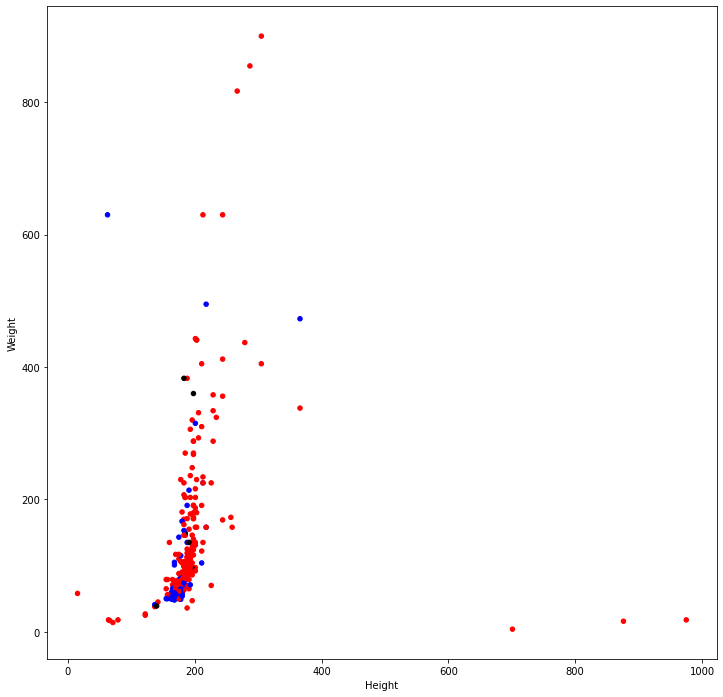

In [53]:
df.plot.scatter('Height', 
                'Weight', 
                c = df['Gender'].apply(lambda x: 'Red' if x == 'Male' else 'Blue' if x == 'Female' else 'Black' ),
                figsize = (12,12))

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [54]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    data = dataframe[dataframe['Gender'] == gender][column_name]
    data.hist()
    print(data.describe())
    

count    358.000000
mean     191.974860
std       68.826912
min       15.200000
25%      180.000000
50%      185.000000
75%      193.000000
max      975.000000
Name: Height, dtype: float64


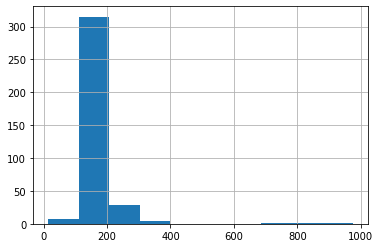

In [55]:
# Male Height
show_distplot(df, 'Male', 'Height')

count    339.000000
mean     125.572271
std      110.821822
min        2.000000
25%       79.000000
50%       90.000000
75%      122.000000
max      900.000000
Name: Weight, dtype: float64


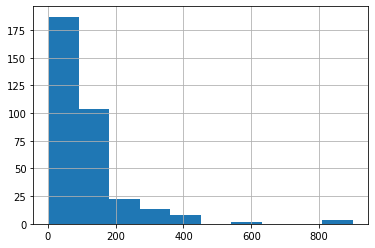

In [56]:
# Male Weight
show_distplot(df, 'Male', 'Weight')

count    144.000000
mean     174.684028
std       23.697817
min       62.500000
25%      168.000000
50%      170.000000
75%      178.000000
max      366.000000
Name: Height, dtype: float64


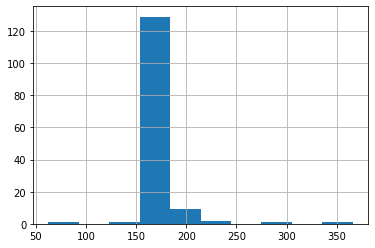

In [57]:
# Female Height
show_distplot(df, 'Female', 'Height')

count    142.000000
mean      78.838028
std       76.975877
min       41.000000
25%       54.000000
50%       58.000000
75%       65.000000
max      630.000000
Name: Weight, dtype: float64


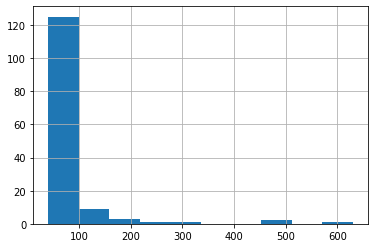

In [58]:
# Female Weight
show_distplot(df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

All four distributions are right skewed with fairly extreme outliers. Mode and median tend to agree with humanoid proportions. Mean is skewed by outliers as one would expect.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [59]:
powers_df.sum().sort_values(ascending = False).head(5)

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [60]:
df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=177)

In [61]:
df[df['Publisher'] == 'Marvel Comics'].drop(heroes_df.columns, axis = 1).sum().sort_values(ascending = False).head(5)

Super Strength    204.0
Durability        154.0
Stamina           150.0
Super Speed       137.0
Agility           126.0
dtype: float64

In [62]:
df[df['Publisher'] == 'DC Comics'].drop(heroes_df.columns, axis = 1).sum().sort_values(ascending = False).head(5)

Super Strength    109.0
Stamina            90.0
Flight             86.0
Super Speed        79.0
Agility            71.0
dtype: float64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

Super Strength is the most common power for both publishers. Stamina, Super Speed, and Agility are represented among the top five powers for both publishers. Durability was unique to the Marvel top five while Flight was unique to the DC top five.  

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

array([[<AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='Weight', ylabel='Height'>],
       [<AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>]], dtype=object)

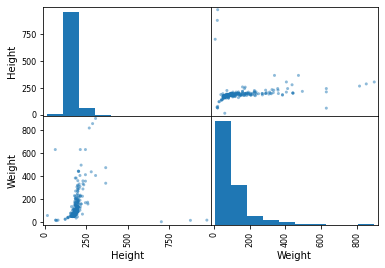

In [63]:
pd.plotting.scatter_matrix(heroes_df)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data